#Authors
Ruohan Wang: 260911138\
Junyu Li: 260957495


# Q1


## Q1 Experiment Design

We design the experiments for both SARSA and Expected SARSA with the parameter setting to 

version 1: temparature = [0.01, 0.1, 0.5] & learning_rate = [0.1, 0.3, 0.5]

version 2: temparature = [0.005, 0.01, 0.015] & learning_rate = [0.1, 0.4, 0.7]

versino 3: temparature = [0.01, 0.015, 0.02] &
learning_rate = [0.1, 0.4, 0.7]


The first try of temparature = [0.01, 0.1, 0.5] & learning_rate = [0.1, 0.3, 0.5], we found the average return of of training for temparature = 0.1 and 0.5 were lower than 0.1 which was too low compared with the results of temparature = 0.01. And we also found that the curve is still going up when alpha = 0.5. We thus tune our parameter to temparature = [0.005, 0.01, 0.015] & learning_rate = [0.1, 0.4, 0.7]. (The figure below is not official plot, just a draft of our try with version 1 parameters.)

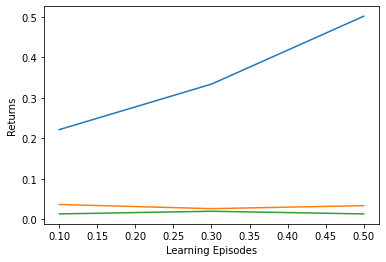

With the version 2 parameters we had our experiment procudures and codes in the below experiment1 section. We found our result of first and second polt fits what described in the instruction, and when alpha = 0.4, temperatura = 0.015 we have the best performance. However since the temperatura = 0.015 is the maximum temperature of this set of parameters, to test whether higher temerature can have a better performance, we selected the thrid version parameters. The third version parameters was carried out in the below experiment 2 section.

We plot figure 1 and figure 2 for both version of parameters respectively to help us determined the best performanced parameters.

In [91]:
import gym
import numpy as np
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

### Q1 Module

In [93]:
#SarsaAgent
class SarsaAgent(object):
    def __init__(self, num_state, num_action, learning_rate, tau, gamma=0.995):
        self.num_state = num_state      # action number
        self.num_action = num_action      # action number
        self.lr = learning_rate # learning rate
        self.gamma = gamma     
        self.tau = tau
        self.Q = np.zeros((self.num_state, self.num_action))

    # epsilon-greedy
#     def sample(self, state):
#         if(np.random.uniform(0,1)<1-self.epsilon):
#             action = self.predict(state)
#         else:
#             action = np.random.choice(self.num_action)
#         return action
    # softmax
    def sample(self, state):
        exp_q = np.exp(self.Q[state,:]/self.tau) 
        probs = exp_q / np.sum(exp_q)
        return np.random.choice(np.arange(self.num_action), p=probs)

    # predict next action for given state
    def predict(self, state):
        q_list = self.Q[state,:]
        max_a = np.max(q_list)
        action_list = np.where(max_a==q_list)[0]
        action = np.random.choice(action_list)      
        return action

    # updating Q table
    def update(self, state, action, reward, next_state, next_action, done):
        if(done):
            target_q = reward
        else:
            target_q = reward + self.gamma * self.Q[next_state,next_action]
        self.Q[state,action] += self.lr * (target_q-self.Q[state,action])

#ExpectedSarsaAgent        
class ExpectedSarsaAgent(object):
    def __init__(self, num_state, num_action, learning_rate, tau, gamma=0.995):
        self.num_action = num_action      # action number
        self.lr = learning_rate # learning rate
        self.gamma = gamma      
        self.tau = tau
        self.Q = np.zeros((num_state, num_action))
    # softmax
    def sample(self, state):
        exp_q = np.exp(self.Q[state,:]/self.tau) 
        probs = exp_q / np.sum(exp_q)
        return np.random.choice(np.arange(self.num_action), p=probs),probs

    # predict next action for given state
    def predict(self, state):
        q_list = self.Q[state,:]
        max_a = np.max(q_list)
        action_list = np.where(max_a==q_list)[0]
        action = np.random.choice(action_list)      
        return action

    # updating Q table
    def update(self, state, action, reward, next_state, next_action, probs, done):
        if(done):
            target_q = reward
        else:
            target_q = reward + self.gamma*np.sum(probs * self.Q[next_state])
        self.Q[state,action] += self.lr*(target_q-self.Q[state,action])

In [94]:
#train&&test
def train_episode(env, agent, mode):
    ##initialize
    total_reward = 0
    steps = 0
    state = env.reset()
    state = state
    if(mode == 'SARSA'):
        action = agent.sample(state)
    elif(mode == 'ExpectedSARSA'):
        action, prostate = agent.sample(state)
    while(True):
        next_state,reward,done,_ = env.step(action)
        #train sarsa
        if(mode == 'SARSA'):
            #get a'
            next_action = agent.sample(next_state)
            agent.update(state,action,reward,next_state,next_action,done)
        elif(mode == 'ExpectedSARSA'):
            #get a'
            next_action, probs = agent.sample(next_state)
            agent.update(state,action,reward,next_state,next_action,probs,done)
        #update s,a
        state = next_state
        total_reward += reward
        action = next_action
        steps += 1
        if done:
            break
    return total_reward,steps

def test_episode(env, agent):
    total_reward = 0
    steps = 0
    state = env.reset()
    state = state
    while True:
        action = agent.predict(state)
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        state = next_state
        steps += 1
        if done:
            break
    return total_reward, steps

## Q1 Exp 1

### Q1 Exp1 Training and Testing

In [95]:
import random
temparature = [0.005, 0.01, 0.015]
learning_rate = [0.1, 0.4, 0.7]
random.seed(0)
np.random.seed(0)

In [96]:
Q1_sarsa_plt = []
Q1_sarsa_exp_plt = []
Q2_sarsa_plt = []
Q2_sarsa_exp_plt = []
for tau in temparature:
    plot_1_sarsa = []
    plot_1_sarsa_exp = []
    plot_2_sarsa = []
    plot_2_sarsa_exp = []
    for lr in learning_rate:
        start_time = time.time()
        print('Setting: lr =',lr,'tau =', tau)
        final_train_sarsa = []
        final_train_sarsa_exp = []
        final_sarsa = []
        final_sarsa_exp = []
        for j in range(10):
            np.random.seed(0)
            sarsa_env = gym.make("FrozenLake-v1", is_slippery = True)
            sarsa_exp_env = gym.make("FrozenLake-v1", is_slippery = True)
            sarsa_agent = SarsaAgent(
                    num_state=sarsa_env.observation_space.n,
                    num_action=sarsa_env.action_space.n,
                    learning_rate=lr,
                    tau = tau,
                    gamma=0.995
                    )
            sarsa_exp_agent = ExpectedSarsaAgent(
                    num_state=sarsa_exp_env.observation_space.n,
                    num_action=sarsa_exp_env.action_space.n,
                    learning_rate=lr,
                    tau = tau,
                    gamma=0.995
                    )
            total_train_sarsa = np.zeros(500)
            total_train_sarsa_exp = np.zeros(500)

            total_test_sarsa = np.zeros(500)
            total_test_sarsa_exp = np.zeros(500)
            
            train_last_sarsa = 0
            train_last_sarsa_exp = 0
            test_last_sarsa = 0
            test_last_sarsa_exp = 0
            #train for 500 segements
            for i in range(500):
                for episode in range(10):
                    ep_reward, ep_steps = train_episode(sarsa_env, sarsa_agent, 'SARSA')
                    total_train_sarsa[i] += ep_reward*(0.995**ep_steps)
                    ep_reward, ep_steps = train_episode(sarsa_exp_env, sarsa_exp_agent, 'ExpectedSARSA')
                    total_train_sarsa_exp[i] += ep_reward*(0.995**ep_steps)
                total_train_sarsa[i] /= 10
                total_train_sarsa_exp[i] /=10
                if i == 499:
                    train_last_sarsa += total_train_sarsa[i]
                    train_last_sarsa_exp += total_train_sarsa_exp[i]
                sarsa_test_reward, sarsa_test_step = test_episode(sarsa_env, sarsa_agent)
                sarsa_exp_test_reward, sarsa_exp_test_step = test_episode(sarsa_exp_env, sarsa_exp_agent)

                total_test_sarsa[i] = sarsa_test_reward*(0.995**sarsa_test_step)
                total_test_sarsa_exp[i] = sarsa_exp_test_reward*(0.995**sarsa_exp_test_step)

            final_train_sarsa.append(total_train_sarsa)
            final_train_sarsa_exp.append(total_train_sarsa_exp)
            final_sarsa.append(total_test_sarsa)
            final_sarsa_exp.append(total_test_sarsa_exp)
            end_time = time.time()    
            print('Running for', end_time-start_time, 'sec for', j, 'th run')

        plot_1_sarsa.append(final_train_sarsa)
        plot_1_sarsa_exp.append(final_train_sarsa_exp)
        plot_2_sarsa.append(final_sarsa)
        plot_2_sarsa_exp.append(final_sarsa_exp)
   
    for i in range(3):
      Q1_sarsa_plt.append(np.divide(np.sum(np.divide(np.sum(plot_1_sarsa[i], axis = 0),10)[-10:]),10))
      Q1_sarsa_exp_plt.append(np.divide(np.sum(np.divide(np.sum(plot_1_sarsa_exp[i], axis = 0),10)[-10:]),10))
      Q2_sarsa_plt.append(np.sum(np.divide(np.sum(plot_2_sarsa[i], axis = 0),10)[-1]))
      Q2_sarsa_exp_plt.append(np.sum(np.divide(np.sum(plot_2_sarsa_exp[i], axis = 0),10)[-1]))

Setting: lr = 0.1 tau = 0.005


/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Running for 27.16172456741333 sec for 0 th run
Running for 49.26798057556152 sec for 1 th run
Running for 70.3291826248169 sec for 2 th run
Running for 98.0864634513855 sec for 3 th run
Running for 123.10579681396484 sec for 4 th run
Running for 157.9971420764923 sec for 5 th run
Running for 182.94674277305603 sec for 6 th run
Running for 213.14469957351685 sec for 7 th run
Running for 240.96302366256714 sec for 8 th run
Running for 269.99060320854187 sec for 9 th run
Setting: lr = 0.4 tau = 0.005
Running for 39.15237498283386 sec for 0 th run
Running for 85.43349742889404 sec for 1 th run
Running for 136.5271565914154 sec for 2 th run
Running for 189.48823285102844 sec for 3 th run
Running for 252.47615146636963 sec for 4 th run
Running for 289.5905900001526 sec for 5 th run
Running for 331.3079056739807 sec for 6 th run
Running for 379.97415947914124 sec for 7 th run
Running for 424.4357862472534 sec for 8 th run
Running for 461.23036313056946 sec for 9 th run
Setting: lr = 0.7 tau =

### Q1.1 Exp1

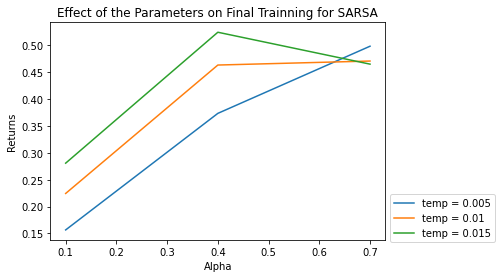

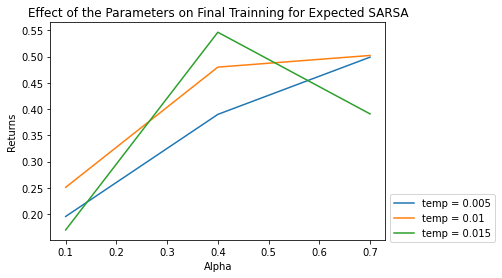

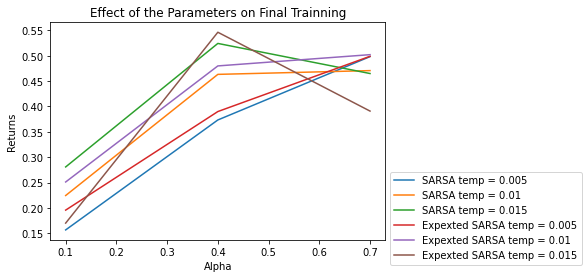

In [106]:
plt.plot(learning_rate, Q1_sarsa_plt[:3],'-',label="temp = " + str(temparature[0]))
plt.plot(learning_rate, Q1_sarsa_plt[3:6],'-',label="temp = " + str(temparature[1]))
plt.plot(learning_rate, Q1_sarsa_plt[6:],'-',label="temp = " + str(temparature[2]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.1))
plt.xlabel('Alpha')
plt.ylabel('Returns')
plt.title('Effect of the Parameters on Final Trainning for SARSA')
plt.show()

plt.plot(learning_rate, Q1_sarsa_exp_plt[:3],'-',label="temp = " + str(temparature[0]))
plt.plot(learning_rate, Q1_sarsa_exp_plt[3:6],'-',label="temp = " + str(temparature[1]))
plt.plot(learning_rate, Q1_sarsa_exp_plt[6:],'-',label="temp = " + str(temparature[2]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.1))
plt.xlabel('Alpha')
plt.ylabel('Returns')
plt.title('Effect of the Parameters on Final Trainning for Expected SARSA')
plt.show()

plt.plot(learning_rate, Q1_sarsa_plt[:3],'-',label="SARSA temp = " + str(temparature[0]))
plt.plot(learning_rate, Q1_sarsa_plt[3:6],'-',label="SARSA temp = " + str(temparature[1]))
plt.plot(learning_rate, Q1_sarsa_plt[6:],'-',label="SARSA temp = " + str(temparature[2]))
plt.plot(learning_rate, Q1_sarsa_exp_plt[:3],'-',label="Expexted SARSA temp = " + str(temparature[0]))
plt.plot(learning_rate, Q1_sarsa_exp_plt[3:6],'-',label="Expexted SARSA temp = " + str(temparature[1]))
plt.plot(learning_rate, Q1_sarsa_exp_plt[6:],'-',label="Expexted SARSA temp = " + str(temparature[2]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.1))
plt.xlabel('Alpha')
plt.ylabel('Returns')
plt.title('Effect of the Parameters on Final Trainning')
plt.show()



### Q1.2 Exp1

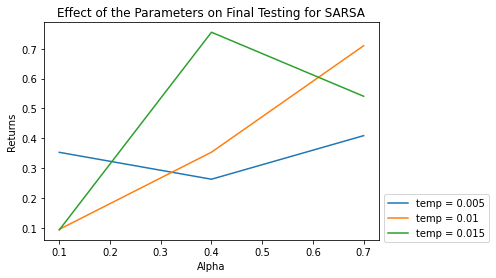

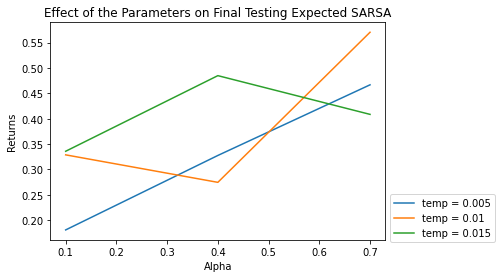

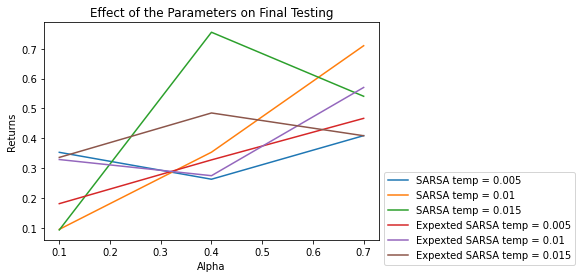

In [107]:
plt.plot(learning_rate, Q2_sarsa_plt[:3],'-',label="temp = " + str(temparature[0]))
plt.plot(learning_rate, Q2_sarsa_plt[3:6],'-',label="temp = " + str(temparature[1]))
plt.plot(learning_rate, Q2_sarsa_plt[6:],'-',label="temp = " + str(temparature[2]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.1))
plt.xlabel('Alpha')
plt.ylabel('Returns')
plt.title('Effect of the Parameters on Final Testing for SARSA')
plt.show()

plt.plot(learning_rate, Q2_sarsa_exp_plt[:3],'-',label="temp = " + str(temparature[0]))
plt.plot(learning_rate, Q2_sarsa_exp_plt[3:6],'-',label="temp = " + str(temparature[1]))
plt.plot(learning_rate, Q2_sarsa_exp_plt[6:],'-',label="temp = " + str(temparature[2]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.1))
plt.xlabel('Alpha')
plt.ylabel('Returns')
plt.title('Effect of the Parameters on Final Testing Expected SARSA')
plt.show()

plt.plot(learning_rate, Q2_sarsa_plt[:3],'-',label="SARSA temp = " + str(temparature[0]))
plt.plot(learning_rate, Q2_sarsa_plt[3:6],'-',label="SARSA temp = " + str(temparature[1]))
plt.plot(learning_rate, Q2_sarsa_plt[6:],'-',label="SARSA temp = " + str(temparature[2]))
plt.plot(learning_rate, Q2_sarsa_exp_plt[:3],'-',label="Expexted SARSA temp = " + str(temparature[0]))
plt.plot(learning_rate, Q2_sarsa_exp_plt[3:6],'-',label="Expexted SARSA temp = " + str(temparature[1]))
plt.plot(learning_rate, Q2_sarsa_exp_plt[6:],'-',label="Expexted SARSA temp = " + str(temparature[2]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.1))
plt.xlabel('Alpha')
plt.ylabel('Returns')
plt.title('Effect of the Parameters on Final Testing')
plt.show()


## Q1 Exp 2

### Q1 Exp2 Traing and Testing

In [ ]:
import random
temparature = [0.01, 0.015, 0.02]
learning_rate = [0.1, 0.4, 0.7]
random.seed(0)
np.random.seed(0)

In [ ]:
Q1_sarsa_plt = []
Q1_sarsa_exp_plt = []
Q2_sarsa_plt = []
Q2_sarsa_exp_plt = []
for tau in temparature:
    plot_1_sarsa = []
    plot_1_sarsa_exp = []
    plot_2_sarsa = []
    plot_2_sarsa_exp = []
    for lr in learning_rate:
        start_time = time.time()
        print('Setting: lr =',lr,'tau =', tau)
        final_train_sarsa = []
        final_train_sarsa_exp = []
        final_sarsa = []
        final_sarsa_exp = []
        for j in range(10):
            np.random.seed(0)
            sarsa_env = gym.make("FrozenLake-v1", is_slippery = True)
            sarsa_exp_env = gym.make("FrozenLake-v1", is_slippery = True)
            sarsa_agent = SarsaAgent(
                    num_state=sarsa_env.observation_space.n,
                    num_action=sarsa_env.action_space.n,
                    learning_rate=lr,
                    tau = tau,
                    gamma=0.995
                    )
            sarsa_exp_agent = ExpectedSarsaAgent(
                    num_state=sarsa_exp_env.observation_space.n,
                    num_action=sarsa_exp_env.action_space.n,
                    learning_rate=lr,
                    tau = tau,
                    gamma=0.995
                    )
            total_train_sarsa = np.zeros(500)
            total_train_sarsa_exp = np.zeros(500)

            total_test_sarsa = np.zeros(500)
            total_test_sarsa_exp = np.zeros(500)
            
            train_last_sarsa = 0
            train_last_sarsa_exp = 0
            test_last_sarsa = 0
            test_last_sarsa_exp = 0
            #train for 500 segements
            for i in range(500):
                for episode in range(10):
                    ep_reward, ep_steps = train_episode(sarsa_env, sarsa_agent, 'SARSA')
                    total_train_sarsa[i] += ep_reward*(0.995**ep_steps)
                    ep_reward, ep_steps = train_episode(sarsa_exp_env, sarsa_exp_agent, 'ExpectedSARSA')
                    total_train_sarsa_exp[i] += ep_reward*(0.995**ep_steps)
                total_train_sarsa[i] /= 10
                total_train_sarsa_exp[i] /=10
                if i == 499:
                    train_last_sarsa += total_train_sarsa[i]
                    train_last_sarsa_exp += total_train_sarsa_exp[i]
                sarsa_test_reward, sarsa_test_step = test_episode(sarsa_env, sarsa_agent)
                sarsa_exp_test_reward, sarsa_exp_test_step = test_episode(sarsa_exp_env, sarsa_exp_agent)

                total_test_sarsa[i] = sarsa_test_reward*(0.995**sarsa_test_step)
                total_test_sarsa_exp[i] = sarsa_exp_test_reward*(0.995**sarsa_exp_test_step)

            final_train_sarsa.append(total_train_sarsa)
            final_train_sarsa_exp.append(total_train_sarsa_exp)
            final_sarsa.append(total_test_sarsa)
            final_sarsa_exp.append(total_test_sarsa_exp)
            end_time = time.time()    
            print('Running for', end_time-start_time, 'sec for', j, 'th run')

        plot_1_sarsa.append(final_train_sarsa)
        plot_1_sarsa_exp.append(final_train_sarsa_exp)
        plot_2_sarsa.append(final_sarsa)
        plot_2_sarsa_exp.append(final_sarsa_exp)
   
    for i in range(3):
      Q1_sarsa_plt.append(np.divide(np.sum(np.divide(np.sum(plot_1_sarsa[i], axis = 0),10)[-10:]),10))
      Q1_sarsa_exp_plt.append(np.divide(np.sum(np.divide(np.sum(plot_1_sarsa_exp[i], axis = 0),10)[-10:]),10))
      Q2_sarsa_plt.append(np.sum(np.divide(np.sum(plot_2_sarsa[i], axis = 0),10)[-1]))
      Q2_sarsa_exp_plt.append(np.sum(np.divide(np.sum(plot_2_sarsa_exp[i], axis = 0),10)[-1]))

Setting: lr = 0.1 tau = 0.01


/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Running for 26.763916492462158 sec for 0 th run
Running for 48.62539029121399 sec for 1 th run
Running for 75.90149569511414 sec for 2 th run
Running for 97.12154507637024 sec for 3 th run
Running for 125.02218198776245 sec for 4 th run
Running for 152.455974817276 sec for 5 th run
Running for 177.19747853279114 sec for 6 th run
Running for 195.50486278533936 sec for 7 th run
Running for 212.83818936347961 sec for 8 th run
Running for 233.37738275527954 sec for 9 th run
Setting: lr = 0.4 tau = 0.01
Running for 37.595760345458984 sec for 0 th run
Running for 69.15264534950256 sec for 1 th run
Running for 103.62168836593628 sec for 2 th run
Running for 147.86643147468567 sec for 3 th run
Running for 186.11807918548584 sec for 4 th run
Running for 213.51980352401733 sec for 5 th run
Running for 245.70215892791748 sec for 6 th run
Running for 284.29182386398315 sec for 7 th run
Running for 319.02868127822876 sec for 8 th run
Running for 357.32619071006775 sec for 9 th run
Setting: lr = 0.7

### Q1.1 Exp2 

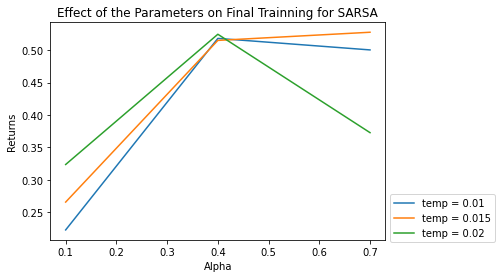

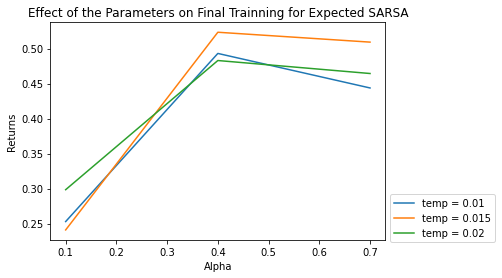

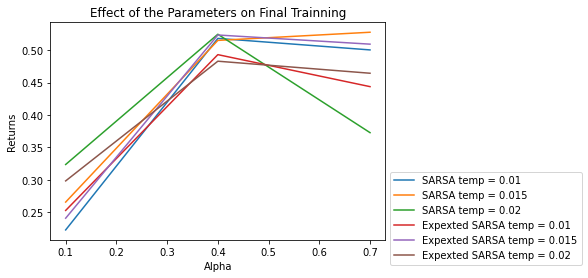

In [ ]:
plt.plot(learning_rate, Q1_sarsa_plt[:3],'-',label="temp = " + str(temparature[0]))
plt.plot(learning_rate, Q1_sarsa_plt[3:6],'-',label="temp = " + str(temparature[1]))
plt.plot(learning_rate, Q1_sarsa_plt[6:],'-',label="temp = " + str(temparature[2]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.1))
plt.xlabel('Alpha')
plt.ylabel('Returns')
plt.title('Effect of the Parameters on Final Trainning for SARSA')
plt.show()

plt.plot(learning_rate, Q1_sarsa_exp_plt[:3],'-',label="temp = " + str(temparature[0]))
plt.plot(learning_rate, Q1_sarsa_exp_plt[3:6],'-',label="temp = " + str(temparature[1]))
plt.plot(learning_rate, Q1_sarsa_exp_plt[6:],'-',label="temp = " + str(temparature[2]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.1))
plt.xlabel('Alpha')
plt.ylabel('Returns')
plt.title('Effect of the Parameters on Final Trainning for Expected SARSA')
plt.show()

plt.plot(learning_rate, Q1_sarsa_plt[:3],'-',label="SARSA temp = " + str(temparature[0]))
plt.plot(learning_rate, Q1_sarsa_plt[3:6],'-',label="SARSA temp = " + str(temparature[1]))
plt.plot(learning_rate, Q1_sarsa_plt[6:],'-',label="SARSA temp = " + str(temparature[2]))
plt.plot(learning_rate, Q1_sarsa_exp_plt[:3],'-',label="Expexted SARSA temp = " + str(temparature[0]))
plt.plot(learning_rate, Q1_sarsa_exp_plt[3:6],'-',label="Expexted SARSA temp = " + str(temparature[1]))
plt.plot(learning_rate, Q1_sarsa_exp_plt[6:],'-',label="Expexted SARSA temp = " + str(temparature[2]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.1))
plt.xlabel('Alpha')
plt.ylabel('Returns')
plt.title('Effect of the Parameters on Final Trainning')
plt.show()

### Q1.2 Exp2

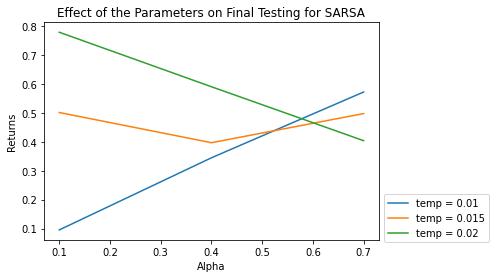

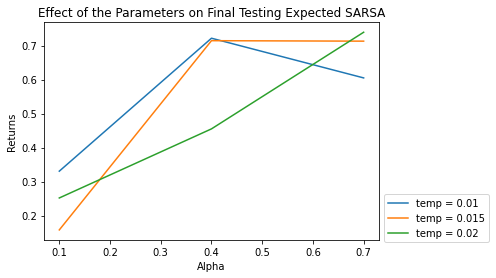

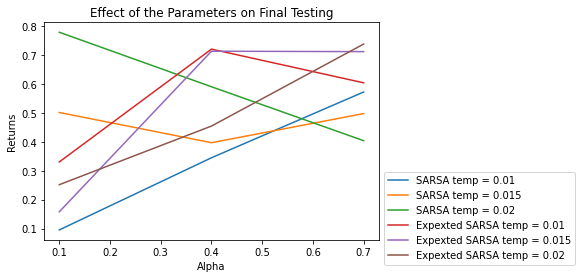

In [ ]:
plt.plot(learning_rate, Q2_sarsa_plt[:3],'-',label="temp = " + str(temparature[0]))
plt.plot(learning_rate, Q2_sarsa_plt[3:6],'-',label="temp = " + str(temparature[1]))
plt.plot(learning_rate, Q2_sarsa_plt[6:],'-',label="temp = " + str(temparature[2]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.1))
plt.xlabel('Alpha')
plt.ylabel('Returns')
plt.title('Effect of the Parameters on Final Testing for SARSA')
plt.show()

plt.plot(learning_rate, Q2_sarsa_exp_plt[:3],'-',label="temp = " + str(temparature[0]))
plt.plot(learning_rate, Q2_sarsa_exp_plt[3:6],'-',label="temp = " + str(temparature[1]))
plt.plot(learning_rate, Q2_sarsa_exp_plt[6:],'-',label="temp = " + str(temparature[2]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.1))
plt.xlabel('Alpha')
plt.ylabel('Returns')
plt.title('Effect of the Parameters on Final Testing Expected SARSA')
plt.show()

plt.plot(learning_rate, Q2_sarsa_plt[:3],'-',label="SARSA temp = " + str(temparature[0]))
plt.plot(learning_rate, Q2_sarsa_plt[3:6],'-',label="SARSA temp = " + str(temparature[1]))
plt.plot(learning_rate, Q2_sarsa_plt[6:],'-',label="SARSA temp = " + str(temparature[2]))
plt.plot(learning_rate, Q2_sarsa_exp_plt[:3],'-',label="Expexted SARSA temp = " + str(temparature[0]))
plt.plot(learning_rate, Q2_sarsa_exp_plt[3:6],'-',label="Expexted SARSA temp = " + str(temparature[1]))
plt.plot(learning_rate, Q2_sarsa_exp_plt[6:],'-',label="Expexted SARSA temp = " + str(temparature[2]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.1))
plt.xlabel('Alpha')
plt.ylabel('Returns')
plt.title('Effect of the Parameters on Final Testing')
plt.show()


## Q1.3

In [108]:
lr = 0.4
tau = 0.015
start_time = time.time()
print('Setting: lr =',lr,'tau =', tau)
final_train_sarsa = []
final_train_sarsa_exp = []
final_sarsa = []
final_sarsa_exp = []
for j in range(10):
  np.random.seed(0)
  sarsa_env = gym.make("FrozenLake-v1", is_slippery = True)
  sarsa_exp_env = gym.make("FrozenLake-v1", is_slippery = True)
  sarsa_agent = SarsaAgent(
      num_state=sarsa_env.observation_space.n,
      num_action=sarsa_env.action_space.n,
      learning_rate=lr,
      tau = tau,
      gamma=0.995
      )
  sarsa_exp_agent = ExpectedSarsaAgent(
      num_state=sarsa_exp_env.observation_space.n,
      num_action=sarsa_exp_env.action_space.n,
      learning_rate=lr,
      tau = tau,
      gamma=0.995
      )
  total_train_sarsa = np.zeros(500)
  total_train_sarsa_exp = np.zeros(500)
  total_test_sarsa = np.zeros(500)
  total_test_sarsa_exp = np.zeros(500)
  #train for 500 segements
  for i in range(500):
    for episode in range(10):
      ep_reward, ep_steps = train_episode(sarsa_env, sarsa_agent, 'SARSA')
      total_train_sarsa[i] += ep_reward*(0.995**ep_steps)
      ep_reward, ep_steps = train_episode(sarsa_exp_env, sarsa_exp_agent, 'ExpectedSARSA')
      total_train_sarsa_exp[i] += ep_reward*(0.995**ep_steps)
    total_train_sarsa[i] /= 10
    total_train_sarsa_exp[i] /=10
    sarsa_test_reward, sarsa_test_step = test_episode(sarsa_env, sarsa_agent)
    sarsa_exp_test_reward, sarsa_exp_test_step = test_episode(sarsa_exp_env, sarsa_exp_agent)
    total_test_sarsa[i] = sarsa_test_reward*(0.995**sarsa_test_step)
    total_test_sarsa_exp[i] = sarsa_exp_test_reward*(0.995**sarsa_exp_test_step)
  final_train_sarsa.append(total_train_sarsa)
  final_train_sarsa_exp.append(total_train_sarsa_exp)
  final_sarsa.append(total_test_sarsa)
  final_sarsa_exp.append(total_test_sarsa_exp)
  end_time = time.time()    
  print('Running for', end_time-start_time, 'sec for', j, 'th run')


Setting: lr = 0.4 tau = 0.015


/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Running for 52.14290690422058 sec for 0 th run
Running for 103.30710816383362 sec for 1 th run
Running for 152.59855008125305 sec for 2 th run
Running for 209.8331208229065 sec for 3 th run
Running for 258.13772201538086 sec for 4 th run
Running for 313.95285177230835 sec for 5 th run
Running for 366.63280034065247 sec for 6 th run
Running for 421.8054828643799 sec for 7 th run
Running for 475.7824935913086 sec for 8 th run
Running for 552.110270023346 sec for 9 th run


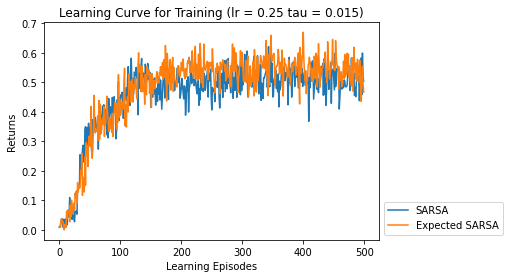

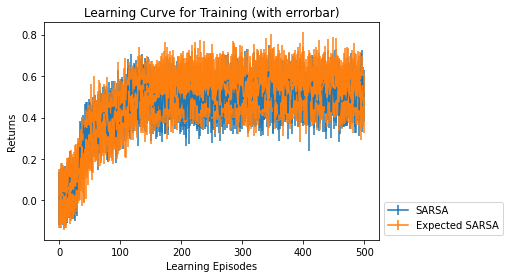

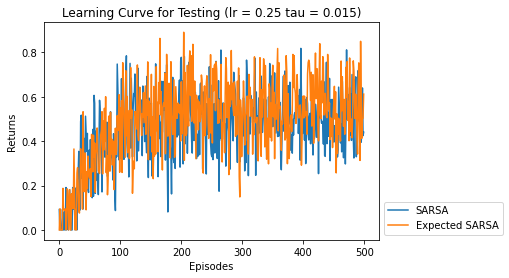

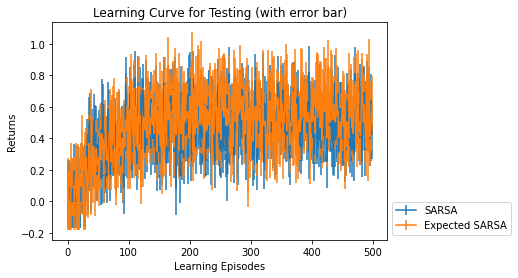

In [165]:
x = range(500)
y_sarsa = np.divide(np.sum(final_train_sarsa, axis = 0),10)
y_sarsa_exp = np.divide(np.sum(final_train_sarsa_exp, axis = 0),10)
plt.plot(x, y_sarsa, label = 'SARSA')
plt.plot(x, y_sarsa_exp, label = 'Expected SARSA')
plt.xlabel('Learning Episodes')
plt.ylabel('Returns')
plt.title('Learning Curve for Training (lr = '+str(lr)+' tau = ' + str(tau)+ ')')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.1))
plt.show()

plt.errorbar(x, y_sarsa, yerr=np.std(y_sarsa), label = 'SARSA')
plt.errorbar(x, y_sarsa_exp, yerr=np.std(y_sarsa_exp), label = 'Expected SARSA')
plt.xlabel('Learning Episodes')
plt.ylabel('Returns')
plt.title('Learning Curve for Training (with errorbar)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.1))
plt.show()

y_sarsa_test = np.divide(np.sum(final_sarsa, axis = 0),10)
y_sarsa_exp_test = np.divide(np.sum(final_sarsa_exp, axis = 0),10)
plt.plot(x, y_sarsa_test, label = 'SARSA')
plt.plot(x, y_sarsa_exp_test, label = 'Expected SARSA')
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Learning Curve for Testing (lr = '+str(lr)+' tau = ' + str(tau)+ ')')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.1))
plt.show()

plt.errorbar(x, y_sarsa_test, yerr=np.std(y_sarsa_test), label = 'SARSA')
plt.errorbar(x, y_sarsa_exp_test, yerr=np.std(y_sarsa_exp_test), label = 'Expected SARSA')
plt.xlabel('Learning Episodes')
plt.ylabel('Returns')
plt.title('Learning Curve for Testing (with error bar)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.1))
plt.show()


## Q1 Conclusions

Based on our experiments, we found when alpha = 0.4 and temperature = 0.015 performed best for both models from the figure 1 and figure 2 of two sets parameters. 

Although SARSA has better curve trends when temperature = 0.02, we found the max returns of temperature = 0.015 exceed that of temperature = 0.02, which lead us to choose temperature = 0.015 for SARSA. The peak of curve in figur1 for SARSA is always shows at alpha = 0.4. We thus chose temperature = 0.015 and alpha = 0.4 as the best parameter for Expected SARSA.

For Expected SARSA we found the combination of alpha = 0.4 and temperature = 0.015 always performed well, we thus chose them as the best parameter for Expected SARSA.

We conclude the learning curve for training and average return curve for them in the Q1.3 section. The figure shows that the performance of SARSA and Expected SARSA are similar in the Frozen Lake environment, while the Expected SARSA is a little bit well performed compare to SARSA.

# Q2

## Q-learning

In [ ]:
!pip install gymnasium

In [135]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import time

In [136]:
np.random.seed(7)

In [137]:
!pip install gym[classic_control]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 7.7 MB/s eta 0:00:00


In [138]:
import numpy as np # used for arrays
# import gym # pull the environment
import time # to get the time
import math # needed for calculations
import os
import matplotlib.pyplot as plt


os.environ["SDL_VIDEODRIVER"] = "dummy"
env = gym.make("CartPole-v1")
bin_size = 10
bins = [np.linspace(-2.4,2.4,bin_size),
        np.linspace(-2.4,2.4,bin_size),
        np.linspace(-0.209,0.209,bin_size),
        np.linspace(-1.5,1.5,bin_size)]

In [139]:
def Discrete(state, bins):
    index = []
    for i in range(len(state)): 
        index.append(np.digitize(state[i], bins[i]) - 1)
    return tuple(index)

In [140]:
def discontinued_reward(step_rewards, gamma):
    discontinued_rewards=np.zeros(len(step_rewards))
    discontinued_rewards[-1]=step_rewards[-1]
    # print(len(step_rewards))
    for i in range(len(step_rewards)-2,-1,-1):
      discontinued_rewards[i]=gamma*discontinued_rewards[i+1]+step_rewards[i]
    discontinued_rewards = discontinued_rewards/np.max(discontinued_rewards)
    return np.sum(discontinued_rewards)

In [142]:
def q_learning(LEARNING_RATE, epsilon, seed, EPISODES=1000, GAMMA=0.995):
    q_table = np.random.uniform(low=-0.001, high=0.001, size=([10] * 4 + [2]))

    ep_rewards = []
    np.random.seed(seed)
    for _ in range(EPISODES):
        obs,info = env.reset(seed=seed)
        discrete_state = Discrete(obs,bins)
        episode_reward = 0
        done = False
        step_rewards = []

        if np.random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[discrete_state])

        while not done: 
            new_state, reward, done, _, _ = env.step(action)
            step_rewards.append(reward)

            episode_reward += reward
            new_discrete_state = Discrete(new_state, bins)

            if np.random.uniform(0,1) < epsilon:
                new_action = env.action_space.sample()
            else:
                new_action = np.argmax(q_table[new_discrete_state])

            q_table[discrete_state + (action,)] += LEARNING_RATE * (reward + GAMMA * q_table[new_discrete_state + (new_action,)] - q_table[discrete_state + (action,)])
            discrete_state = new_discrete_state
            action = new_action

        ep_rewards.append(discontinued_reward(step_rewards,GAMMA))

    return ep_rewards

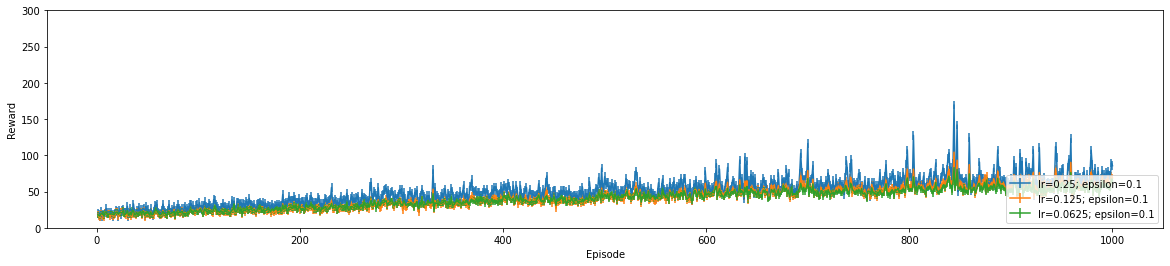

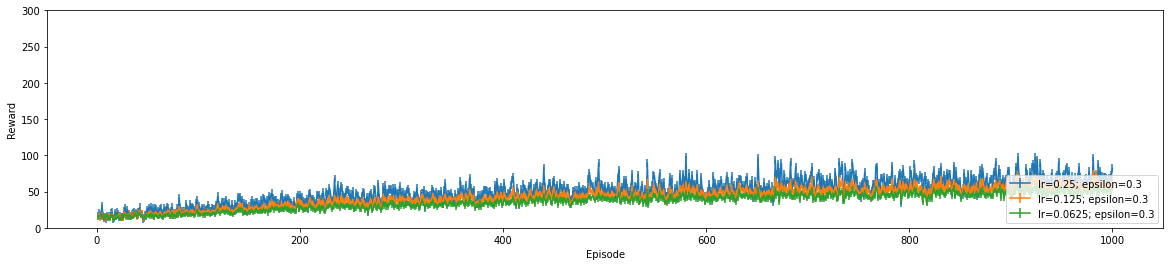

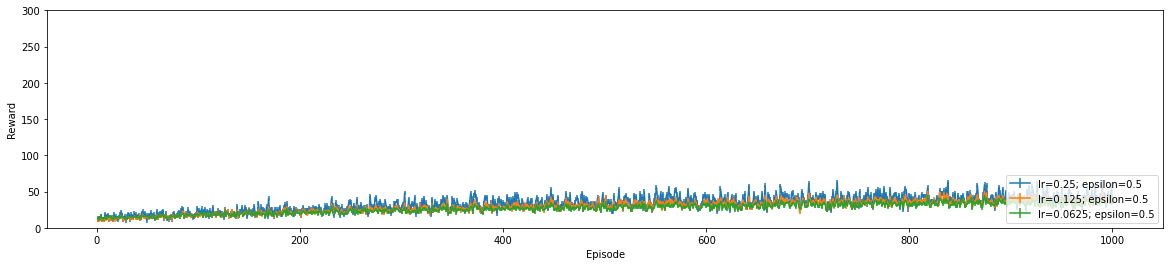

In [143]:
lrs = np.array([1/4,1/8,1/16])
epsilons = np.array([0.1,0.3,0.5])
x = range(1, 1001)

for epsilon in epsilons:
  plt.figure().set_figwidth(20)
  rewards = []
  for lr in lrs:
    for i in range(0,10):
      ep_rewards = q_learning(lr, epsilon, i)
      rewards.append(ep_rewards)
    avg_rewards = np.mean(rewards, axis=0)
    plt.errorbar(x,avg_rewards,yerr=np.std(avg_rewards)/np.sqrt(10), label="lr=" + str(lr) + "; epsilon=" + str(epsilon))
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.legend(loc = "lower right")
  
  plt.ylim(0, 300)
  plt.show()
  

# Actor Critic

In [ ]:
import gym
import numpy as np

# Define hyperparameters
num_episodes = 1000
num_runs = 3
num_bins = 10
weights_min = -0.001
weights_max = 0.001
epsilon_values = [1/4]
alpha_actor = 0.1
alpha_critic = 0.2
gamma = 0.995

In [ ]:
def one_hot(states):
    bin = np.zeros(40)
    for i in range(0,4):
        bin[i*10+states[i]]=1
    return bin

In [ ]:
def Discrete_ac(state, bins):
    index = []
    for i in range(len(state)):
        index.append(np.digitize(state[i], bins[i]) - 1)
    # print(index)
    result = one_hot(index)
    return result

In [ ]:
import gymnasium as gym
env = gym.make("CartPole-v1")

In [ ]:
from pyparsing import actions
def actor_critic(alpha_actor, alpha_critic, seed, state_space=4, action_space=2, episodes=1000, gamma=0.995):
    np.random.seed(seed)
    theta_actor = np.random.uniform(low=-0.001,high=0.001,size=(40, 2))
    theta_critic = np.random.uniform(low=-0.001,high=0.001,size=40)
    ep_rewards = []
    
    for _ in range(episodes):
        obs, info = env.reset(seed=seed)
        current_state = Discrete_ac(obs, bins)
        done = False
        step_rewards = []
        
        while not done:
            action_probs = np.exp(np.dot(current_state, theta_actor))
            action_probs /= np.sum(action_probs)

            current_action = np.random.choice(action_space, p=action_probs)

            next_state, reward, done, _, _ = env.step(current_action)
            next_state = Discrete_ac(next_state, bins)
            step_rewards.append(reward)

            Vw = np.dot(next_state, theta_critic)
            td_error = reward + gamma * Vw - np.dot(current_state, theta_critic)
            theta_critic += alpha_critic * td_error * current_state
            
            actor_gradient = current_state * action_probs[1 - current_action]
            theta_actor[:, current_action] += alpha_actor * td_error * actor_gradient

            current_state = next_state
        # print(len(step_rewards))       
        ep_rewards.append(discontinued_reward2(step_rewards,gamma))
        x2 = 10 * np.ones(1000)
    return ep_rewards/x2

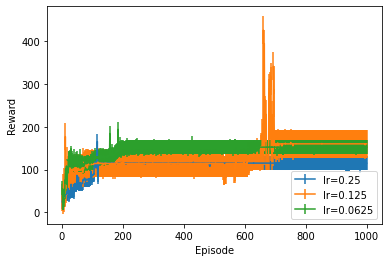

<Figure size 1440x288 with 0 Axes>

In [ ]:
lrs = np.array([1/4, 1/8, 1/16])
x = range(1, 1001)

rewards = np.zeros((10,1000))

plt.xlabel('Episode')
plt.ylabel('Reward')
# plt.ylim(0, 00)

for lr in lrs:
  for i in range(0,10):
    ep_rewards = actor_critic(lr, lr, i)
    rewards[i] = (ep_rewards)
  avg_rewards = np.mean(rewards, axis=0)
  plt.errorbar(x,avg_rewards,yerr=np.std(avg_rewards), label="lr=" + str(lr))
plt.legend(loc = "lower right")
plt.figure().set_figwidth(20)
plt.show()

#Best

In [ ]:
def discontinued_reward(step_rewards, gamma):
    discontinued_rewards=np.zeros(len(step_rewards))
    discontinued_rewards[-1]=step_rewards[-1]
    # print(len(step_rewards))
    for i in range(len(step_rewards)-2,-1,-1):
      discontinued_rewards[i]=gamma*discontinued_rewards[i+1]+step_rewards[i]
    discontinued_rewards = discontinued_rewards/np.max(discontinued_rewards)
    return np.sum(discontinued_rewards)

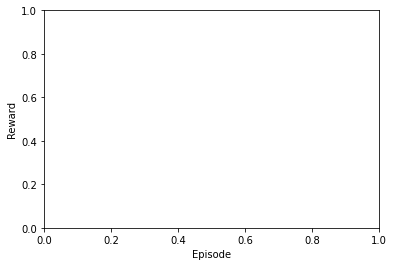

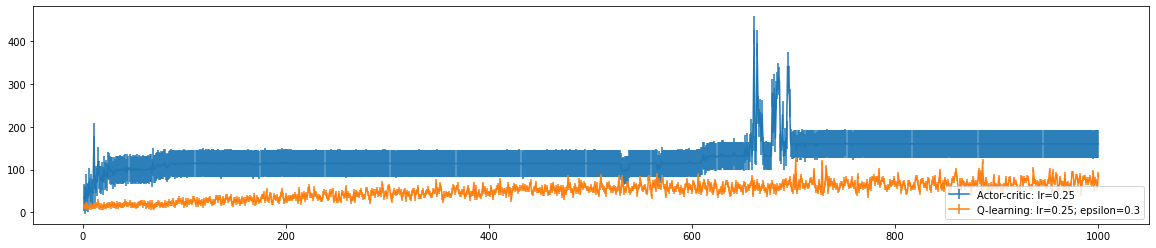

In [ ]:
lrs = np.array([1/4])
epsilons = np.array([0.3])
x = range(1, 1001)

rewards = np.zeros((10,1000))

plt.xlabel('Episode')
plt.ylabel('Reward')
# plt.figure().set_figwidth(20)
# plt.ylim(0, 00)

for i in range(0,10):
  ep_rewards = actor_critic(0.125, 0.125, i)
  rewards[i] = (ep_rewards)
avg_rewards = np.mean(rewards, axis=0)
plt.figure().set_figwidth(20)
plt.errorbar(x,avg_rewards,yerr=np.std(avg_rewards), label="Actor-critic: lr=" + str(lr))

rewards = []
for epsilon in epsilons:
  rewards = []
  for lr in lrs:
    for i in range(0,10):
      ep_rewards = q_learning(1/4, 0.3, i)
      rewards.append(ep_rewards)
    avg_rewards = np.mean(rewards, axis=0)
    # plt.figure().set_figwidth(20)
    plt.errorbar(x,avg_rewards,yerr=np.std(avg_rewards)/np.sqrt(10), label="Q-learning: lr=" + str(lr) + "; epsilon=" + str(epsilon))

plt.legend(loc = "lower right")
plt.show()

Introduction: In this experiment, we will compare the performance of two reinforcement learning algorithms - Q-learning and actor-critic - on the CartPole-v1 environment of the OpenAI Gymnasium. We will use linear function approximation with ten bins for each state variable and discretize the state space. We will experiment with different learning rates and epsilon for Q-learning and different learning rates with **softmax** exploration policies for actor-critic.

Results: Based on these graphs, we can see that Q-learning and actor-critic both perform better with greater learning rate. The best learning rate value depends on epsilon value for Q-learning, but generally, alpha = 1/4 seems to perform better than the other values (the best value of epsilon is 0.3).

Conclusion: In this experiment, we compared the performance of Q-learning and actor-critic with linear function approximation on the CartPole-v1 environment of the OpenAI Gymnasium. We found that Q-learning perform better with greater learning rate and the best value depends on the epsilon value, actor-critic performs better with smaller learning rate. Q-learning performs better with a larger epsilon value. Based on these results, we recommend using alpha = 1/8 for actor-critic and 1/4 for Q-learning, epsilon = 0.3 for Q-learning. The best learning curves for Q-learning and actor-critic show that both algorithms can learn to balance the pole on the cart, but actor-critic tends to converge faster and achieve better performance in fewer episodes.

